# 4.7.7 Poisson Regression

Finally, we fit a Poisson regression model to the `Bikeshare` data set, which measures the number of bike rentals (`bikers`) per hour in Washington, DC. The data can be found in the `ISLR2` library.

In [1]:
library(ISLR2)
dim(Bikeshare)

[1] 8645   15

In [2]:
names(Bikeshare)

[1] "season"     "mnth"       "day"        "hr"         "holiday"   
 [6] "weekday"    "workingday" "weathersit" "temp"       "atemp"     
[11] "hum"        "windspeed"  "casual"     "registered" "bikers"

We begin by fitting a least squares linear regression model to the data.

In [3]:
mod.lm <- lm( bikers ~ mnth + hr + workingday + temp + weathersit, data = Bikeshare)
summary(mod.lm)


Call:
lm(formula = bikers ~ mnth + hr + workingday + temp + weathersit, 
    data = Bikeshare)

Residuals:
    Min      1Q  Median      3Q     Max 
-299.00  -45.70   -6.23   41.08  425.29 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -68.632      5.307 -12.932  < 2e-16 ***
mnthFeb                      6.845      4.287   1.597 0.110398    
mnthMarch                   16.551      4.301   3.848 0.000120 ***
mnthApril                   41.425      4.972   8.331  < 2e-16 ***
mnthMay                     72.557      5.641  12.862  < 2e-16 ***
mnthJune                    67.819      6.544  10.364  < 2e-16 ***
mnthJuly                    45.324      7.081   6.401 1.63e-10 ***
mnthAug                     53.243      6.640   8.019 1.21e-15 ***
mnthSept                    66.678      5.925  11.254  < 2e-16 ***
mnthOct                     75.834      4.950  15.319  < 2e-16 ***
mnthNov                     60.310      4.610  13.083  < 2

Due to space constraints, we truncate the output of `summary(mod.lm)`. In `mod.lm`, the first level of `hr` (0) and `mnth` (Jan) are treated as the baseline values, and so no coefficient estimates are provided for them: implicitly, their coefficient estimates are zero, and all other levels are measured relative to these baselines. For example, the Feb coefficient of $6.845$ signifies that, holding all other variables constant, there are on average about $7$ more riders in February than in January. Similarly there are about $16.5$ more riders in March than in January.  

The results seen in Section 4.6.1 used a slightly different coding of the variables `hr` and `mnth`, as follows:

In [4]:
contrasts(Bikeshare$hr) = contr.sum(24)
contrasts(Bikeshare$mnth) = contr.sum(12)
mod.lm2 <- lm(bikers ~ mnth + hr + workingday + temp + weathersit, data = Bikeshare)
summary(mod.lm2)


Call:
lm(formula = bikers ~ mnth + hr + workingday + temp + weathersit, 
    data = Bikeshare)

Residuals:
    Min      1Q  Median      3Q     Max 
-299.00  -45.70   -6.23   41.08  425.29 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 73.5974     5.1322  14.340  < 2e-16 ***
mnth1                      -46.0871     4.0855 -11.281  < 2e-16 ***
mnth2                      -39.2419     3.5391 -11.088  < 2e-16 ***
mnth3                      -29.5357     3.1552  -9.361  < 2e-16 ***
mnth4                       -4.6622     2.7406  -1.701  0.08895 .  
mnth5                       26.4700     2.8508   9.285  < 2e-16 ***
mnth6                       21.7317     3.4651   6.272 3.75e-10 ***
mnth7                       -0.7626     3.9084  -0.195  0.84530    
mnth8                        7.1560     3.5347   2.024  0.04295 *  
mnth9                       20.5912     3.0456   6.761 1.46e-11 ***
mnth10                      29.7472     2.6995 

What is the difference between the two codings? In `mod.lm2`, a coefficient estimate is reported for all but the last level of `hr` and `mnth`. Importantly instead, it equals the _negative of the sum of the coefficient estimates for all of the other levels_. Similarly, in `mod.lm2`, the coefficient estimate for the last level of `hr` is the negative of the sum of the coefficient estimates for all of the other levels. This means that the coefficients of `hr` and `mnth` in `mod.lm2` will always sum to zero, and can be interpreted as the difference from the mean level. For example, the coefficient for January of $-46.087$ indicates that, holding all other variables constant, there are typically $46$ fewer riders in January relative to the yearly average.  

It is important to realize that the choice of coding really does not matter, provided that we interpret the model output correctly in light of the coding used. For example, we see that the predictions from the linear model are the same regardless of coding:

In [5]:
sum((predict(mod.lm) - predict(mod.lm2))^2)

[1] 2.089708e-21

The sum of squared differences is zero. We can also see this using the `all.equal()` function:

In [6]:
all.equal(predict(mod.lm), predict(mod.lm2))

[1] TRUE

To reproduce the left-hand side of Figure 4.13, we must first obtain the coefficient estimates associated with `mnth`. THe coefficients for January through November can be obtained directly from the `mod.lm2` object. The coefficient for December must be explicitly computed as the negative sum of all the other months.

In [7]:
coef.months <- c(coef(mod.lm2)[2:12], -sum(coef(mod.lm2)[2:12]))

To make the plot, we manually label the _x_-axis with the names of the months

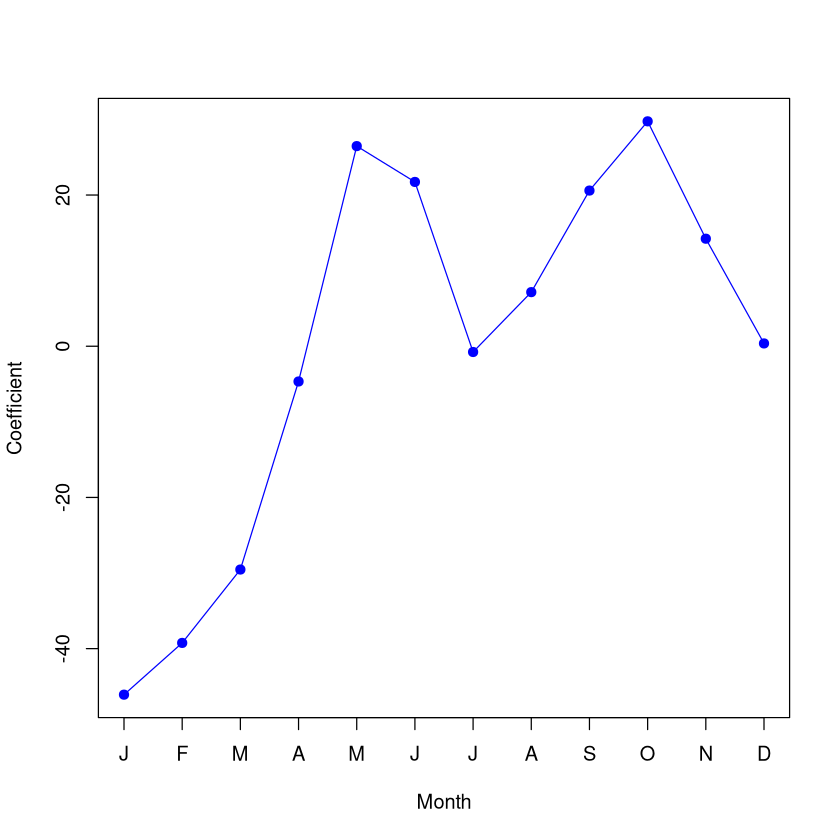

In [8]:
plot(coef.months, xlab = "Month", ylab = "Coefficient", xaxt = "n", col = "blue", pch = 19, type = "o")
axis(side = 1, at = 1:12, labels = c("J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"))

Reproducing the right-hand side of Figure 4.13 follows a similar process

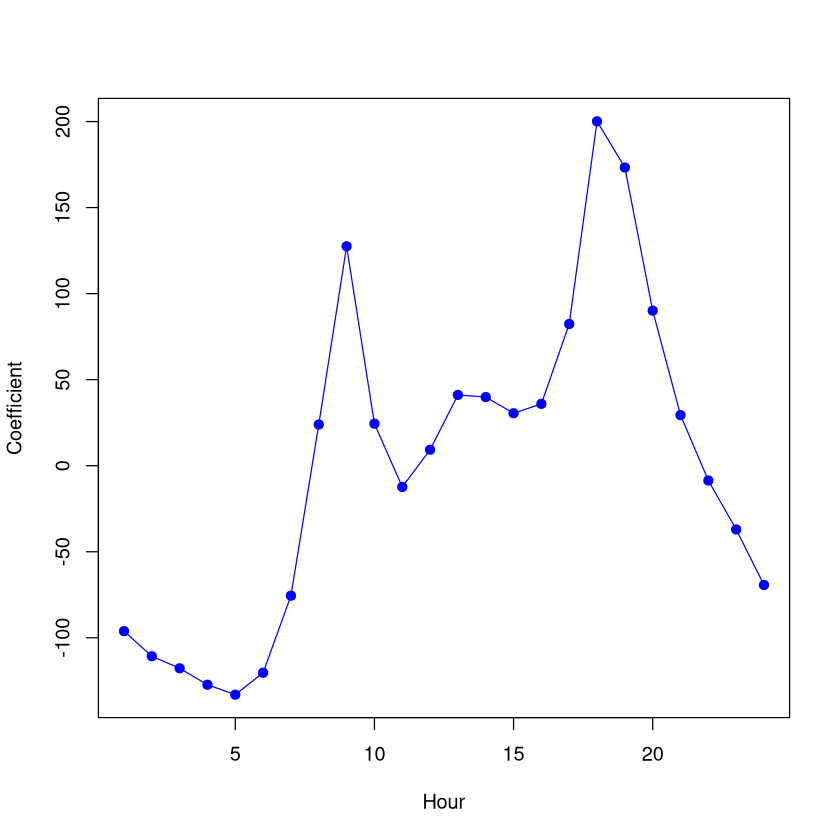

In [9]:
coef.hours <- c(coef(mod.lm2)[13:35], -sum(coef(mod.lm2)[13:35]))
plot(coef.hours, xlab = "Hour", ylab = "Coefficient", col = "blue", pch = 19, type = "o")

Now, we consider instead fitting a Poisson regression model to the `Bikeshare` data. Very little changes, except that we now use the function `glm()` with the argument `family = poisson` to specify that we wish to fit a Poisson regression model:

In [10]:
mod.pois <- glm(bikers ~ mnth + hr + workingday + temp + weathersit, data = Bikeshare, family = poisson)
summary(mod.pois)


Call:
glm(formula = bikers ~ mnth + hr + workingday + temp + weathersit, 
    family = poisson, data = Bikeshare)

Coefficients:
                           Estimate Std. Error  z value Pr(>|z|)    
(Intercept)                4.118245   0.006021  683.964  < 2e-16 ***
mnth1                     -0.670170   0.005907 -113.445  < 2e-16 ***
mnth2                     -0.444124   0.004860  -91.379  < 2e-16 ***
mnth3                     -0.293733   0.004144  -70.886  < 2e-16 ***
mnth4                      0.021523   0.003125    6.888 5.66e-12 ***
mnth5                      0.240471   0.002916   82.462  < 2e-16 ***
mnth6                      0.223235   0.003554   62.818  < 2e-16 ***
mnth7                      0.103617   0.004125   25.121  < 2e-16 ***
mnth8                      0.151171   0.003662   41.281  < 2e-16 ***
mnth9                      0.233493   0.003102   75.281  < 2e-16 ***
mnth10                     0.267573   0.002785   96.091  < 2e-16 ***
mnth11                     0.150264   0.00

We can plot the coefficients associated with `mnth` and `hr`, in order to reproduce Figure 4.15:

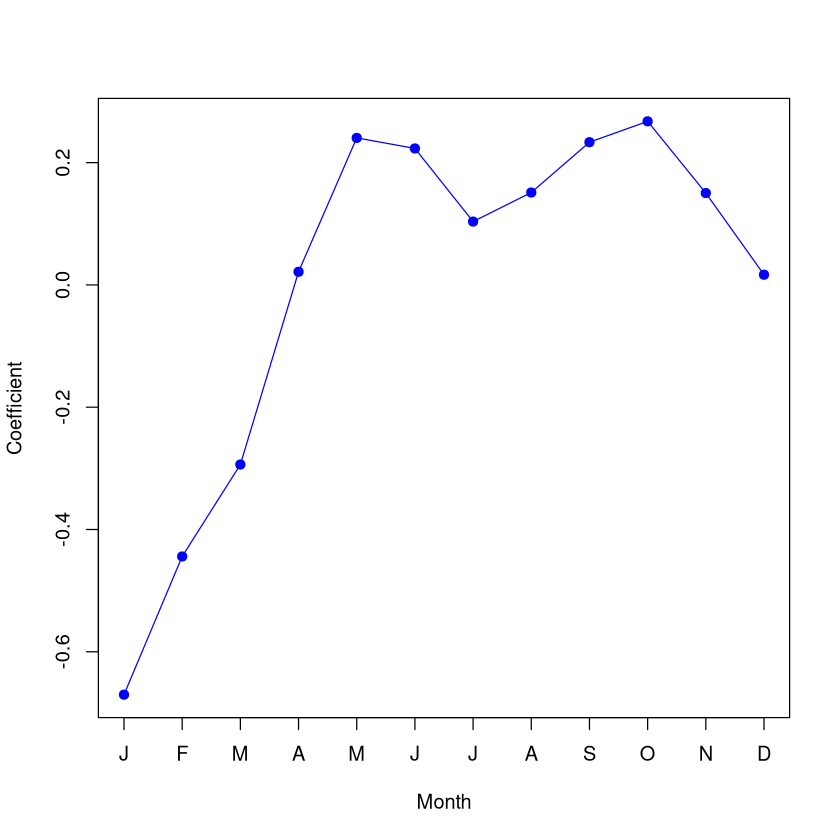

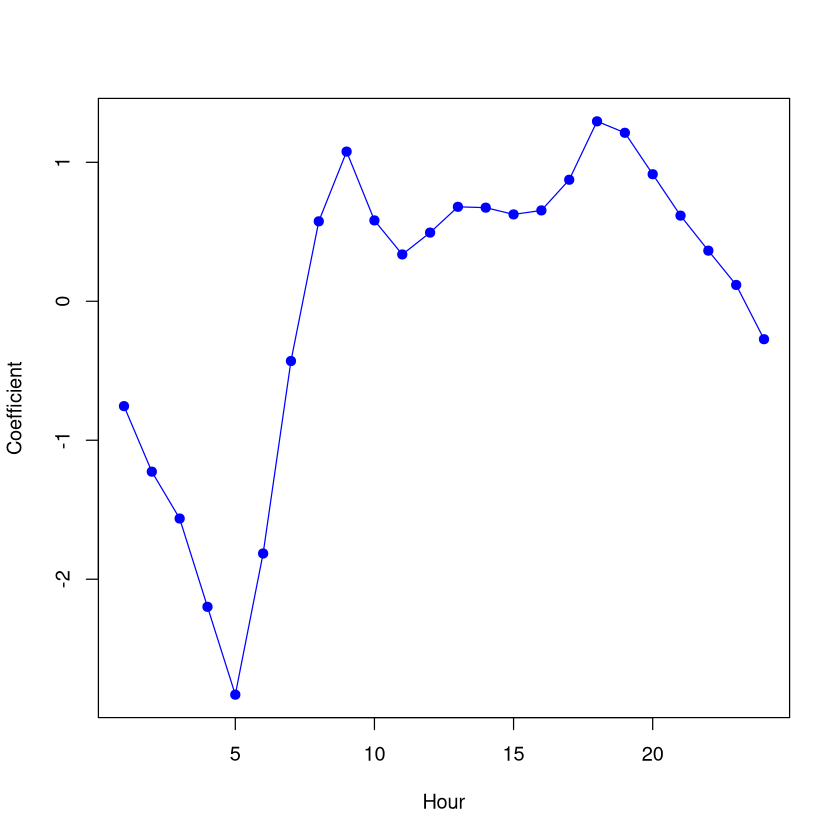

In [11]:
coef.mnth <- c(coef(mod.pois)[2:12], -sum(coef(mod.pois)[2:12]))
plot(coef.mnth, xlab = "Month", ylab = "Coefficient", xaxt = "n", col = "blue" , pch = 19, type = "o")
axis(side = 1, at = 1:12, labels = c("J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"))
coef.hours <- c(coef(mod.pois)[13:35], -sum(coef(mod.pois)[13:35]))
plot(coef.hours, xlab = "Hour", ylab = "Coefficient", col = "blue", pch = 19, type = "o")

We once again use the `predict()` function to obtain the fitted values (predictions) from this Poisson regression model. However, we  must use the argument `type = "response"` to specify that we want `R` to output $\text{exp}(\hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots + \hat{\beta}_p X_p)$, which it will output by defualt.

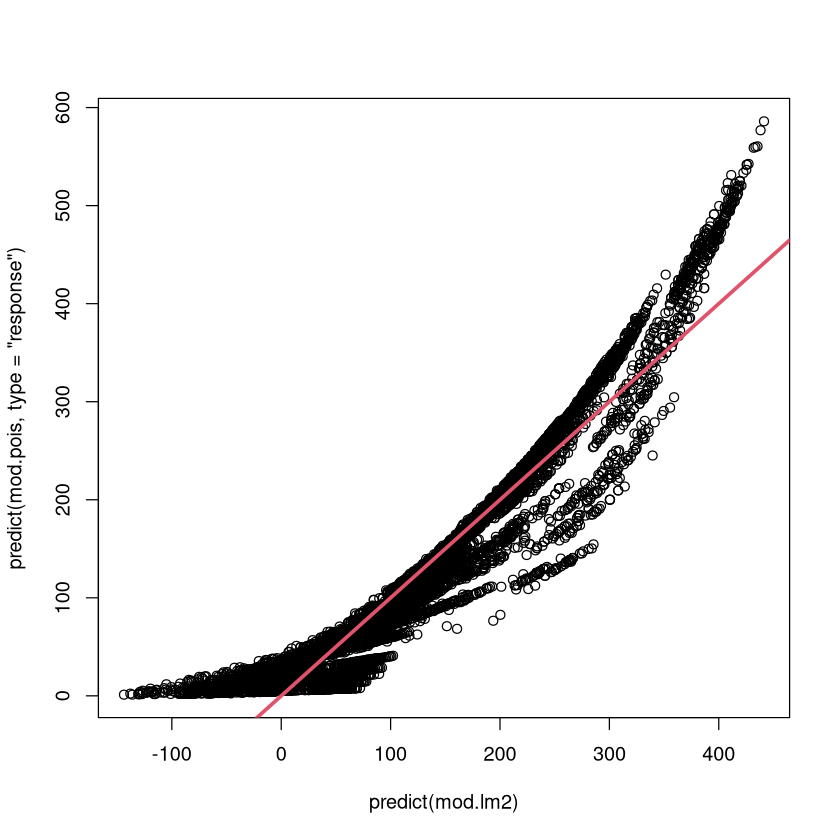

In [12]:
plot(predict(mod.lm2), predict(mod.pois, type = "response"))
abline(0, 1, col = 2, lwd = 3)

The predictions from the Poisson regression model are correlated with those from the linear model; however, the former are non-negative. As a result the Poisson regression predicitons tend to be larger than those from the linear model for either very low or very high levels of ridership.  

In this section, we use the `glm()` function with the argument `family = poisson` in order to perform Poisson regression. Earlier in this lab we used the `glm()` function with `family = binomial` to perform logistic regression. Other choices for the `family` argument can be used to fit other types of GLMs. FOr instance, `family = Gamma` fits a gamma regression model.